In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
sns.set_style('darkgrid')

from sklearn.datasets import make_blobs
from imblearn.datasets import make_imbalance
from imblearn import over_sampling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier as MlModel

# Data Synthesis

In [2]:
X, y = make_blobs(n_samples=1_00_000*50, n_features=2, centers=50, random_state=19)

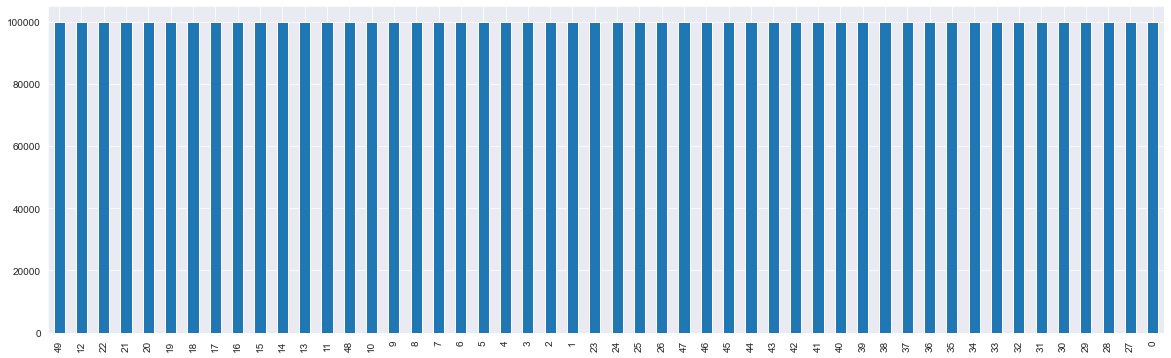

In [3]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.Series(y).value_counts().plot.bar();

In [4]:
CLS_RATIO = {k:v for k,v in enumerate([
    100000,95000,90000,65000,64000,40000,30000,27000,25000,24500,22000,20000,19500,18000,17500,16500,15000,14750,14000,13650,
    10000,9250,7500,5250,4500,4300,3850,3400,3300,3250,3150,2750,2300,2250,1575,1500,1350,1200,1150,1100,1050,900,585,580,570,
    485,400,150,125, 100
])}

In [5]:
X, y = make_imbalance(X, y,sampling_strategy=CLS_RATIO, random_state=19)

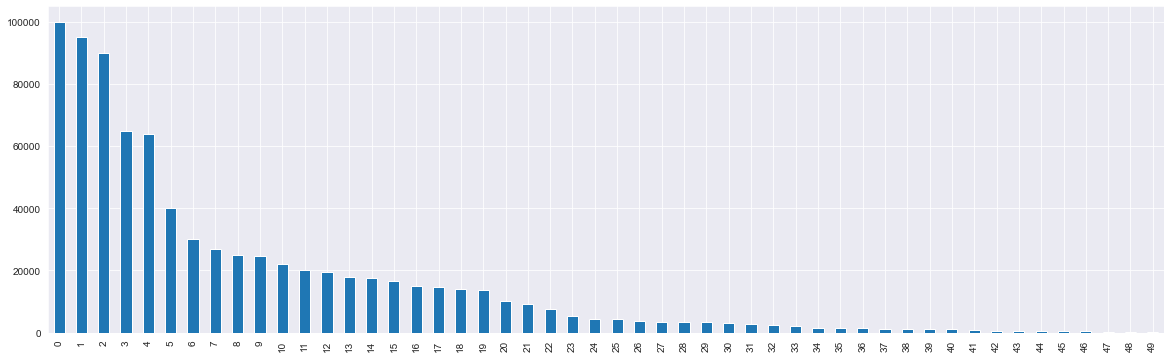

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
pd.Series(y).value_counts().plot.bar();

In [7]:
X = MinMaxScaler().fit_transform(X)

In [8]:
X = pd.DataFrame(X, columns=['feat1', 'feat2'])
y = pd.Series(y, name='target')

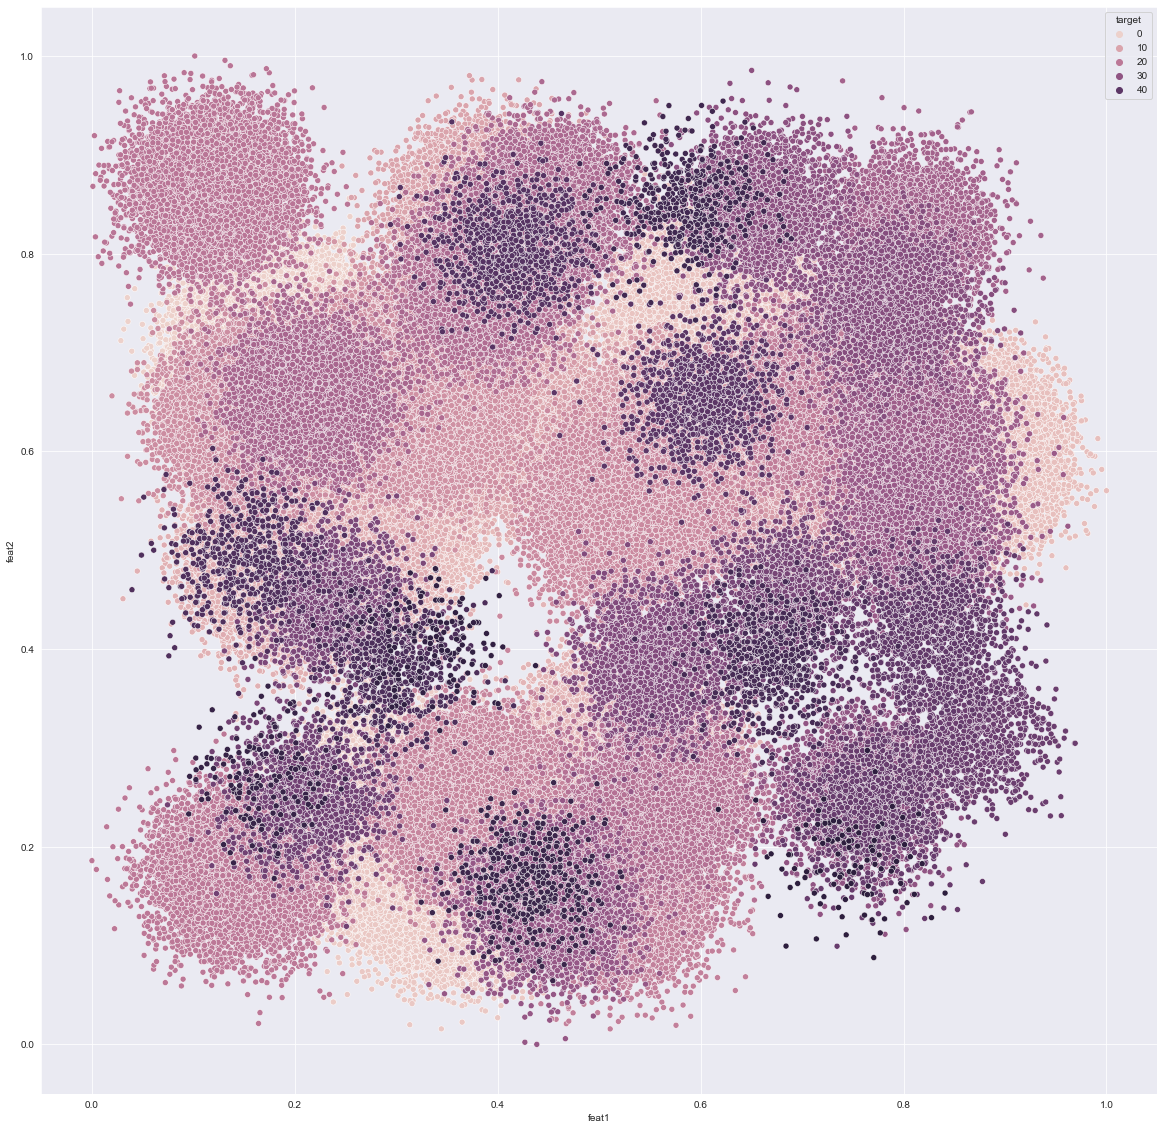

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.scatterplot(data=pd.concat([X, y], axis=1), x='feat1', y='feat2', hue='target');

# Cross Validation

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=19)

# Baseline

In [11]:
%%time

model = MlModel(class_weight='balanced').fit(X_train, y_train)

Wall time: 12.4 s


In [12]:
print(model.score(X_train, y_train), model.score(X_valid, y_valid))

1.0 0.6939340393193866


In [13]:
pred_train = model.predict(X_train)
pred_valid = model.predict(X_valid)

In [14]:
pd.DataFrame(confusion_matrix(y_train, pred_train))

0      1      2      3      4      5      6      7      8      9  \
0   90000      0      0      0      0      0      0      0      0      0   
1       0  85500      0      0      0      0      0      0      0      0   
2       0      0  81000      0      0      0      0      0      0      0   
3       0      0      0  58500      0      0      0      0      0      0   
4       0      0      0      0  57600      0      0      0      0      0   
5       0      0      0      0      0  36000      0      0      0      0   
6       0      0      0      0      0      0  27000      0      0      0   
7       0      0      0      0      0      0      0  24300      0      0   
8       0      0      0      0      0      0      0      0  22500      0   
9       0      0      0      0      0      0      0      0      0  22050   
10      0      0      0      0      0      0      0      0      0      0   
11      0      0      0      0      0      0      0      0      0      0   
12      0      0      0      0      0      0      0      0      0      0   
13      0      0      0      0      0      0      0      0      0      0   
14      0      0      0      0      0      0      0      0      0      0   
15      0      0      0      0      0      0      0      0      0      0   
16      0      0      0      0      0      0      0      0      0      0   
17      0      0      0      0      0      0      0      0      0      0   
18      0      0      0      0      0      0      0      0      0      0   
19      0      0      0      0      0      0      0      0      0      0   
20      0      0      0      0      0      0      0      0      0      0   
21      0      0      0      0      0      0      0      0      0      0   
22      0      0      0      0      0      0      0      0      0      0   
23      0      0      0      0      0      0      0      0      0      0   
24      0      0      0      0      0      0      0      0      0      0   
25      0      0      0      0      0      0      0      0      0      0   
26      0      0      0      0      0      0      0      0      0      0   
27      0      0      0      0      0      0      0      0      0      0   
28      0      0      0      0      0      0      0      0      0      0   
29      0      0      0      0      0      0      0      0      0      0   
30      0      0      0      0      0      0      0      0      0      0   
31      0      0      0      0      0      0      0      0      0      0   
32      0      0      0      0      0      0      0      0      0      0   
33      0      0      0      0      0      0      0      0      0      0   
34      0      0      0      0      0      0      0      0      0      0   
35      0      0      0      0      0      0      0      0      0      0   
36      0      0      0      0      0      0      0      0      0      0   
37      0      0      0      0      0      0      0      0      0      0   
38      0      0      0      0      0      0      0      0      0      0   
39      0      0      0      0      0      0      0      0      0      0   
40      0      0      0      0      0      0      0      0      0      0   
41      0      0      0      0      0      0      0      0      0      0   
42      0      0      0      0      0      0      0      0      0      0   
43      0      0      0      0      0      0      0      0      0      0   
44      0      0      0      0      0      0      0      0      0      0   
45      0      0      0      0      0      0      0      0      0      0   
46      0      0      0      0      0      0      0      0      0      0   
47      0      0      0      0      0      0      0      0      0      0   
48      0      0      0      0      0      0      0      0      0      0   
49      0      0      0      0      0      0      0      0      0      0   

       10     11     12     13     14     15     16     17     18     19  \
0       0      0      0      0      0      0      0    

In [15]:
pd.DataFrame(confusion_matrix(y_valid, pred_valid))

0     1     2     3     4     5     6     7    8     9    10    11  \
0   8452     0     0     0     0    29     0    12   24     4     0     0   
1      0  6990  1917     0     0     0     2     0    0     0     0     0   
2      0  1815  6429     0     0     0    19     0    0     0     0     0   
3      0     0     0  6005     0     0     0     0    0     4     2    32   
4      0     0     0     0  5778     0     0     0    0     0     0    64   
5     38     0     0     0     0  2528     0   376  798    39     0     0   
6      0     3    19     0     0     0  2388     0    0     0     0     0   
7      9     0     0     0     0   343     0  1416  781     0     0     0   
8     24     0     0     0     0   813     0   754  777     0     0     0   
9      0     0     0     3     0    53     0     0    2  1766     4     0   
10     0     0     0     0     0     0     0     0    0    10  1688     0   
11     0     0     0    28    77     0     0     0    0     0     0  1421   
12     0     0     0   181     0     0     0     0    0    25     0   113   
13   190     0     0     0     0    29     0     0    4   210    22     0   
14    98     0     0     0     0   114     0     0   10   340     3     0   
15   896     0     0     0     0    24     0    49   57     0     0     0   
16     0     0     0     3     0     1     0     0    0    46     0    13   
17     0   409   561     0     0     0    56     0    0     0     0     0   
18     0     0    57     0     0     0    61     0    0     0     0     0   
19     0     0     0   134   116     0     0     0    0     0     0   217   
20     0    50     0     0     0     0     0     0    0     0     0     0   
21    25     0     0     0     0     0     0     0    0     0     0     0   
22     0     0     1     0     0     0   388     0    0     0     0     0   
23     2     0     0     0     0     0     0     0    0    32   214     0   
24     0     0     0     5     0     0     0     0    0     0   223     0   
25   296     0     0     0     0    17     0     3    6     0     0     0   
26     0     0     0     2     0     0     0     0    0     0     0     0   
27     0     0     0     0   254     0     0     0    0     0     0    16   
28     0     0     0     0   168     0     0     0    0     0     0    29   
29     0     0   125     0     0     0     4     0    0     0     0     0   
30     0     0     0     0     0     0     1     0    0     0     0     0   
31     0     0     0    66     0     0     0     0    0     0     0     0   
32     0     0     0     7    15     0     0     0    0     0     0     0   
33     0     0     0     0     0     0    83     0    0     0     0     0   
34     0     1     0     0     0    32     0    55   40     0     0     0   
35     0     0     0     0     1     0     0     0    0     0     0    21   
36     0    80     2     0     0     0     0     0    0     0     0     0   
37     0     0     0     0     1     0     0     0    0     0     0     0   
38     0     0     0     0     0     0     0     0    0     0     0     0   
39     0     0     0     0     3     0     0     0    0     0     0     1   
40     0     0     0    45     0     0     0     0    0     0     0    10   
41     0     0     0     0     0     0     0     0    0     0    59     0   
42     0     0     0     0     0     2     0    40   11     0     0     0   
43     0     9     0     0     0    14     0     7    1     0     0     0   
44     0     0     0     0     0     0     2     0    0     0     0     0   
45     0     0     0    10     0     0     0     0    0     0     0     0   
46     0     1    22     0     0     0     0     0    0     0     0     0   
47     0     4     0     0     0     0     0     2    0     0     0     0   
48     0     1     0     0     0     3     1     0    0     0     0     0   
49     0     0     0     0     0     0     0     0    0     0     0     0   

      12   13   14   15    16   17    18   19   20   21   22   23   24   25  \


In [16]:
del model, fig, ax, pred_train, pred_valid, MinMaxScaler, X, y

# Multilevel Model

In [17]:
from sklearn import base 

In [18]:
class MultiLevel(base.BaseEstimator, base.ClassifierMixin):
    
    def __init__(self, models, levels, other_label=-1, resamplers=None, show_plots=False):
        self.models = models
        self.levels = levels
        self.other_label = other_label
        self.resamplers = resamplers
        self.show_plots = show_plots
        
    def fit(self, X, y):
        levels = self.levels
        for i in range(len(levels)):
            levels_curr = levels[i]
            levels_down = [item for sublist in levels[i+1:] for item in sublist]
            levels_up = [item for sublist in levels[:i] for item in sublist]
            X_ = X[y.isin(levels_curr+levels_down)].reset_index(drop=True)
            y_ = y[y.isin(levels_curr+levels_down)].reset_index(drop=True)
            y_[~y_.isin(levels_curr)] = self.other_label           
            print(f'Training Model {i+1} on {len(y_)} rows of data')
            if self.resamplers is not None:
                data=pd.concat([X_, y_], axis=1)
                X_, y_ = self.resamplers[i].fit_resample(X_, y_)
                print(f'Resampled to {len(y_)} rows of data')
            
                if self.show_plots:
                    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
                    sns.scatterplot(data=data, x='feat1', y='feat2', hue='target', ax=ax[0])
                    sns.scatterplot(data=pd.concat([X_, y_], axis=1), x='feat1', y='feat2', hue='target', ax=ax[1])
                    ax[0].set_title('Before Resampling', fontsize=18)
                    ax[1].set_title('After Resampling', fontsize=18)
                    plt.show()
            
            self.models[i] = self.models[i].fit(X_, y_)
        return self
    
    def predict(self, X):
        i = 0
        preds = pd.Series(model.models[i].predict(X))
        while np.sum(preds == self.other_label):
            i += 1
            preds[preds == self.other_label] = model.models[i].predict(X)
        return preds

Training Model 1 on 728343 rows of data
Resampled to 2462823 rows of data


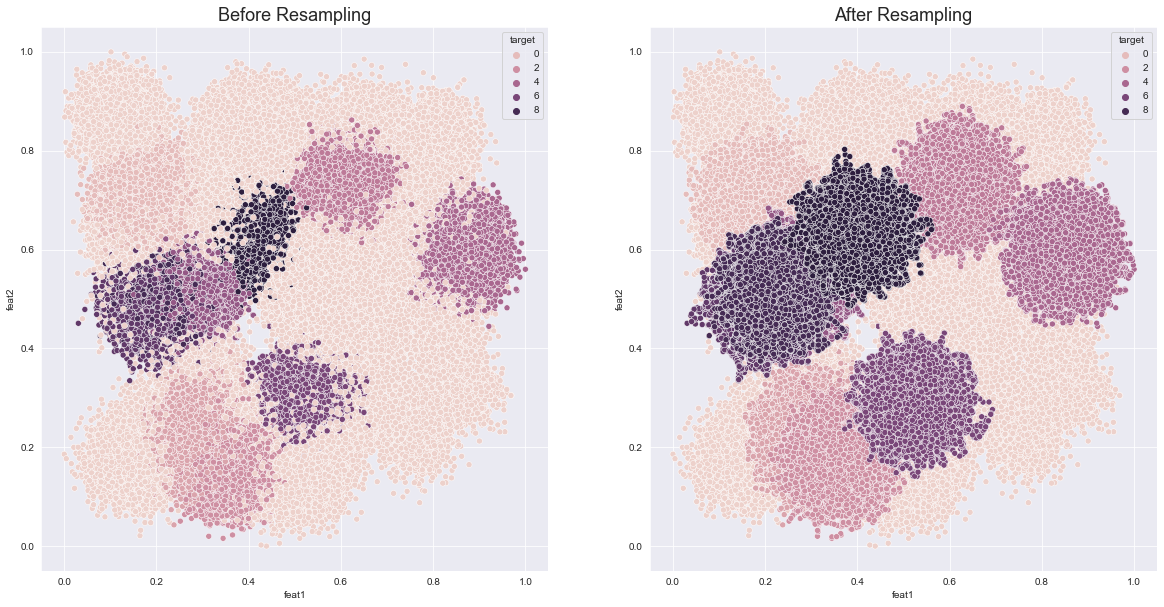

Training Model 2 on 223893 rows of data
Resampled to 770913 rows of data


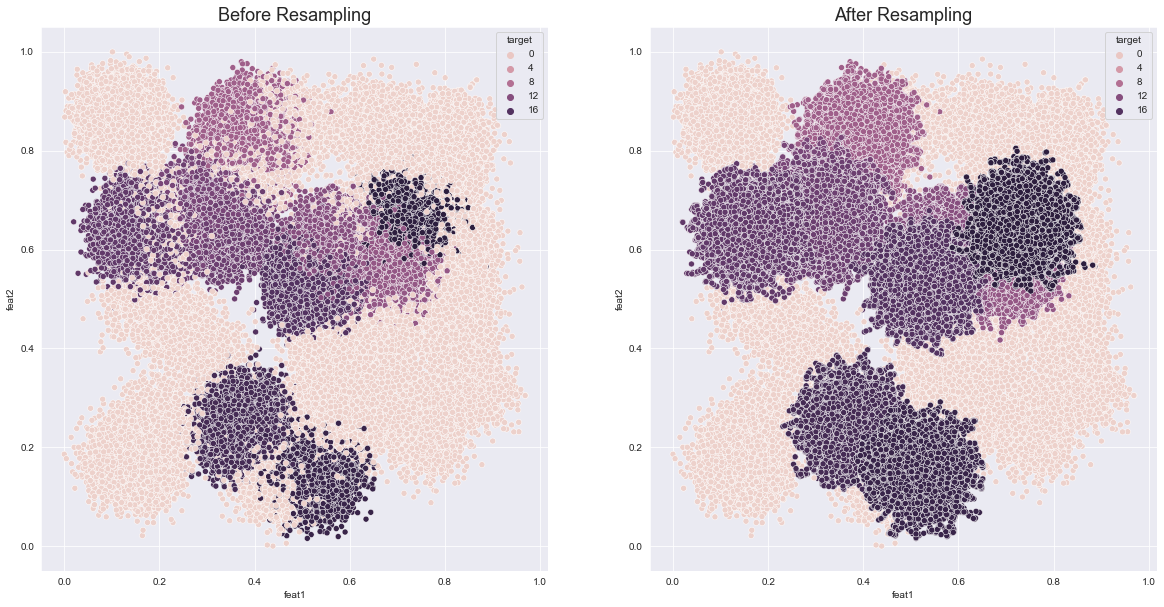

Training Model 3 on 70083 rows of data
Resampled to 230373 rows of data


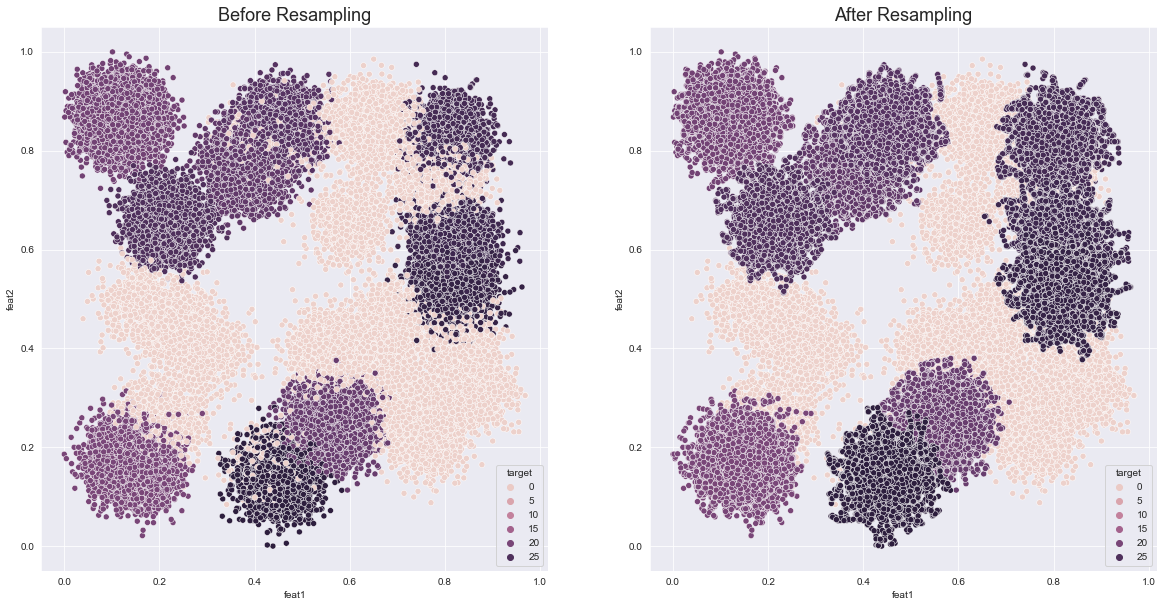

Training Model 4 on 20943 rows of data
Resampled to 48950 rows of data


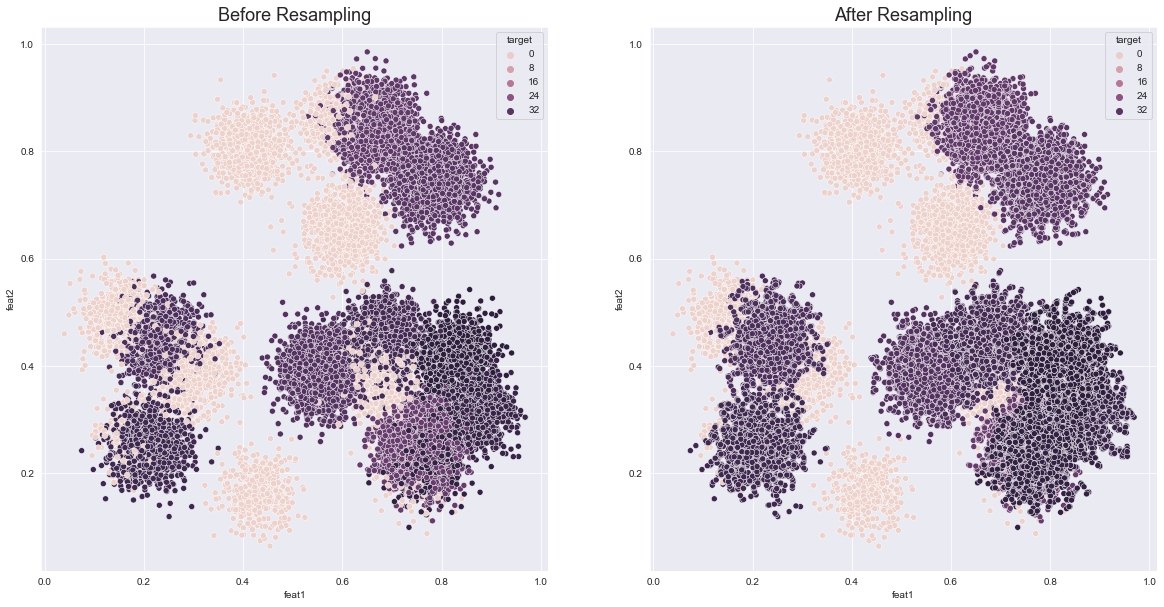

Training Model 5 on 4450 rows of data
Resampled to 9450 rows of data


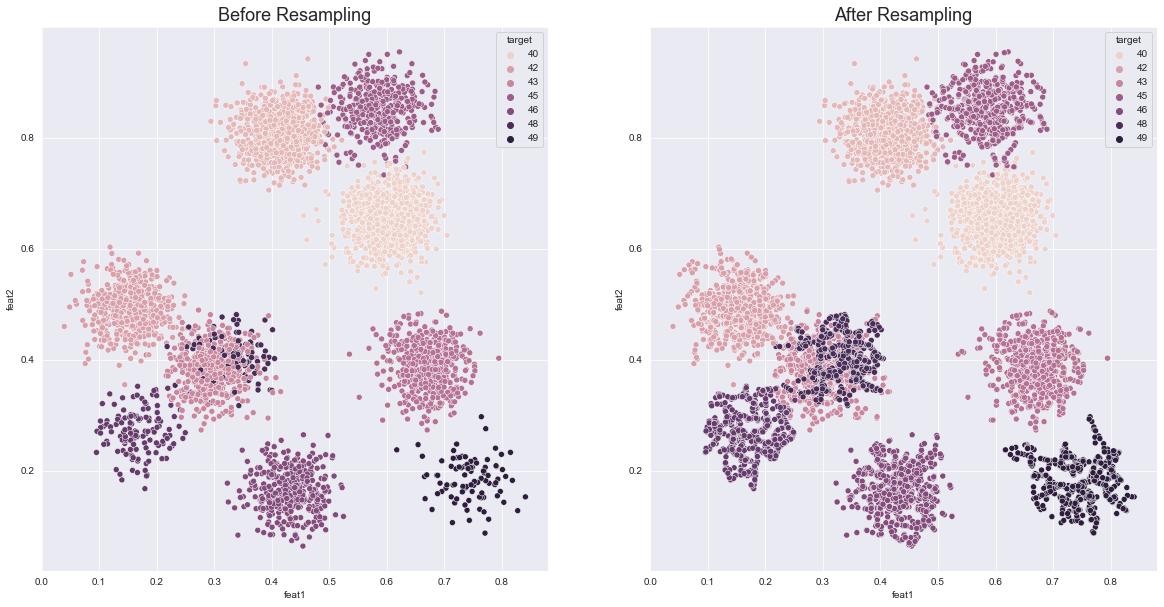

Wall time: 3min 50s


In [19]:
%%time

model = MultiLevel(
    models=[
        MlModel(class_weight='balanced'), MlModel(class_weight='balanced'),
        MlModel(class_weight='balanced'), MlModel(class_weight='balanced'),
        MlModel(class_weight='balanced'), MlModel(class_weight='balanced'),
        MlModel(class_weight='balanced'), MlModel(class_weight='balanced'),
        MlModel(class_weight='balanced'), MlModel(class_weight='balanced'),
    ], 
    levels=[list(range(i*10, (i+1)*10)) for i in range(5)],
    resamplers = [
        over_sampling.SMOTE(), over_sampling.SMOTE(),
        over_sampling.SMOTE(), over_sampling.SMOTE(),
        over_sampling.SMOTE(), over_sampling.SMOTE(),
        over_sampling.SMOTE(), over_sampling.SMOTE(),
        over_sampling.SMOTE(), over_sampling.SMOTE(),
    ],
    show_plots=True
).fit(X_train, y_train)

In [20]:
print(model.score(X_train, y_train), model.score(X_valid, y_valid))

1.0 0.6907706945765937


In [21]:
pred_train = model.predict(X_train)
pred_valid = model.predict(X_valid)

In [22]:
pd.DataFrame(confusion_matrix(y_train, pred_train))

0      1      2      3      4      5      6      7      8      9  \
0   90000      0      0      0      0      0      0      0      0      0   
1       0  85500      0      0      0      0      0      0      0      0   
2       0      0  81000      0      0      0      0      0      0      0   
3       0      0      0  58500      0      0      0      0      0      0   
4       0      0      0      0  57600      0      0      0      0      0   
5       0      0      0      0      0  36000      0      0      0      0   
6       0      0      0      0      0      0  27000      0      0      0   
7       0      0      0      0      0      0      0  24300      0      0   
8       0      0      0      0      0      0      0      0  22500      0   
9       0      0      0      0      0      0      0      0      0  22050   
10      0      0      0      0      0      0      0      0      0      0   
11      0      0      0      0      0      0      0      0      0      0   
12      0      0      0      0      0      0      0      0      0      0   
13      0      0      0      0      0      0      0      0      0      0   
14      0      0      0      0      0      0      0      0      0      0   
15      0      0      0      0      0      0      0      0      0      0   
16      0      0      0      0      0      0      0      0      0      0   
17      0      0      0      0      0      0      0      0      0      0   
18      0      0      0      0      0      0      0      0      0      0   
19      0      0      0      0      0      0      0      0      0      0   
20      0      0      0      0      0      0      0      0      0      0   
21      0      0      0      0      0      0      0      0      0      0   
22      0      0      0      0      0      0      0      0      0      0   
23      0      0      0      0      0      0      0      0      0      0   
24      0      0      0      0      0      0      0      0      0      0   
25      0      0      0      0      0      0      0      0      0      0   
26      0      0      0      0      0      0      0      0      0      0   
27      0      0      0      0      0      0      0      0      0      0   
28      0      0      0      0      0      0      0      0      0      0   
29      0      0      0      0      0      0      0      0      0      0   
30      0      0      0      0      0      0      0      0      0      0   
31      0      0      0      0      0      0      0      0      0      0   
32      0      0      0      0      0      0      0      0      0      0   
33      0      0      0      0      0      0      0      0      0      0   
34      0      0      0      0      0      0      0      0      0      0   
35      0      0      0      0      0      0      0      0      0      0   
36      0      0      0      0      0      0      0      0      0      0   
37      0      0      0      0      0      0      0      0      0      0   
38      0      0      0      0      0      0      0      0      0      0   
39      0      0      0      0      0      0      0      0      0      0   
40      0      0      0      0      0      0      0      0      0      0   
41      0      0      0      0      0      0      0      0      0      0   
42      0      0      0      0      0      0      0      0      0      0   
43      0      0      0      0      0      0      0      0      0      0   
44      0      0      0      0      0      0      0      0      0      0   
45      0      0      0      0      0      0      0      0      0      0   
46      0      0      0      0      0      0      0      0      0      0   
47      0      0      0      0      0      0      0      0      0      0   
48      0      0      0      0      0      0      0      0      0      0   
49      0      0      0      0      0      0      0      0      0      0   

       10     11     12     13     14     15     16     17     18     19  \
0       0      0      0      0      0      0      0    

In [23]:
pd.DataFrame(confusion_matrix(y_valid, pred_valid))

0     1     2     3     4     5     6     7     8     9    10    11  \
0   8728     0     0     0     0    53     0    23    74     7     0     0   
1      0  6931  2139     0     0     0     3     1     0     0     0     0   
2      0  1997  6418     0     0     0    39     0     0     0     0     0   
3      0     0     0  6154     0     0     0     0     0    10     0    19   
4      0     0     0     0  6006     0     0     0     0     0     0    59   
5     26     0     0     0     0  2224     0   544  1014    69     0     0   
6      0     2    14     0     0     0  2661     0     0     0     0     0   
7     10     0     0     0     0   366     0  1362   907     0     0     0   
8     17     0     0     0     0   760     0   800   867     2     0     0   
9      2     0     0     8     0    47     0     0     3  2045     3     0   
10     0     0     0     1     0     0     0     0     0    14  1797     0   
11     0     0     0    59   102     0     0     0     0     0     0  1348   
12     0     0     0   256     0     0     0     0     0    54     0   122   
13   227     0     0     0     0    46     0     1     9   397    30     0   
14   105     0     0     0     0   129     0     5    18   555     7     0   
15   961     0     0     0     0    37     0    80   116     0     0     0   
16     0     0     0     4     0     1     1     0     0    77     0    16   
17     0   443   616     0     0     0    85     0     0     0     0     0   
18     0     1    66     0     0     0   120     0     0     0     0     0   
19     0     0     0   187   170     0     0     0     0     0     0   202   
20     0    79     0     0     0     0     0     0     0     0     0     0   
21    37     0     0     0     0     0     0     0     0     0     0     0   
22     0     0     0     0     0     0   525     0     0     0     0     0   
23     2     0     0     0     0     0     0     0     0    64   249     0   
24     0     0     0     4     0     0     0     0     0     0   276     0   
25   297     0     0     0     0    21     0     4    20     1     0     0   
26     0     0     0     1     0     0     0     0     0     0     0     0   
27     0     0     0     0   269     0     0     0     0     0     0    13   
28     0     0     0     0   193     0     0     0     0     0     0    30   
29     0     3   135     0     0     0    14     0     0     0     0     0   
30     0     0     0     0     0     0     1     0     0     0     0     0   
31     0     0     0    85     0     0     0     0     0     0     0     0   
32     0     0     0    13    21     0     0     0     0     0     0     0   
33     0     0     0     0     0     0   115     0     0     0     0     0   
34     0     2     0     0     0    26     0    73    45     0     0     0   
35     0     0     0     0     2     0     0     0     0     0     0    26   
36     0    85     1     0     0     0     0     0     0     0     0     0   
37     0     0     0     0     0     0     0     0     0     0     0     0   
38     0     0     0     0     0     0     0     0     0     0     0     0   
39     0     0     0     0     4     0     0     0     0     0     0     3   
40     0     0     0    55     0     0     0     0     0     0     0     8   
41     0     0     0     0     0     0     0     0     0     2    65     0   
42     0     0     0     0     0     1     0    41    16     0     0     0   
43     0    13     0     0     0    13     0     3     5     0     0     0   
44     0     0     0     0     0     0     5     0     0     0     0     1   
45     0     0     0    12     0     0     0     0     0     0     1     0   
46     0     1    28     0     0     0     1     0     0     0     0     0   
47     0     3     0     0     0     0     0     2     0     0     0     0   
48     0     1     0     0     0     5     1     0     0     0     0     0   
49     0     0     0     0     0     0     0     0     0     0     0     0   

      12   13   14   15    1